In [1]:
!nvidia-smi

Tue Nov 19 20:15:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.81                 Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   64C    P0             16W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%pwd

'd:\\Projects\\DETECT_TRACK_AND_COUNT_USING_YOLOv8'

Upload Videos

In [3]:
SOURCE_PATH_1='D:/Projects/DETECT_TRACK_AND_COUNT_USING_YOLOv8/1900-151662242_small.mp4'

print(SOURCE_PATH_1)

D:/Projects/DETECT_TRACK_AND_COUNT_USING_YOLOv8/1900-151662242_small.mp4


In [4]:
SOURCE_PATH_2 ='D:/Projects/DETECT_TRACK_AND_COUNT_USING_YOLOv8/2165-155327596_small.mp4'

In [5]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.34  Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 9 5980HS with Radeon Graphics)
Setup complete  (16 CPUs, 31.4 GB RAM, 14.1/244.1 GB disk)


In [7]:
import os
HOME = os.getcwd()
print(HOME)

d:\Projects\DETECT_TRACK_AND_COUNT_USING_YOLOv8


In [8]:
%pip install lapx
%pip install -q loguru
%pip install -q thop

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
# sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
%pip install -q cython_bbox
%pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
%pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)


yolox.__version__: 0.1.0


In [27]:
from IPython import display
display.clear_output()

import sys
sys.path.append(f"{HOME}/ByteTrack")

import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [28]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass

install RoboFlow Supervision

In [33]:
%pip install supervision==0.1.0

Note: you may need to restart the kernel to use updated packages.


In [30]:
from IPython import display
display.clear_output()

import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


Load pretrain model

In [31]:
MODEL = "yolov8x.pt "

In [32]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs


In [18]:
%cd

C:\Users\utkar


In [24]:
# conda install -c conda-forge ultralytics

^C

Note: you may need to restart the kernel to use updated packages.


Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: d:\Anaconda

  added / updated specs:
    - ultralytics


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.9.2               |  py312h2e8e312_0         1.1 MB  conda-forge
    eigen-3.4.0                |       h91493d7_0         1.0 MB  conda-forge
    ffmpeg-4.2.3               |       ha925a31_0        23.2 MB  conda-forge
    gettext-0.19.8.1           |    ha2e2712_1008         4.9 MB  conda-forge
    glib-2.72.1                |       h7755175_0         460 KB  conda-forge
    glib-tools-2.72.1          |       h7755175_0         167 KB  conda-forge
    gst-plugins-base-1.18.5    |       he07aa86_3         2.2 MB  conda-forge
    gstreamer-1.18.5           |       hdff456e_3         2.1 MB  conda-fo

In [34]:
# print(SOURCE_PATH_1)

!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source={SOURCE_PATH_1}

Ultralytics 8.3.34 🚀 Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 9 5980HS with Radeon Graphics)
YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

video 1/1 (frame 1/1501) D:\Projects\DETECT_TRACK_AND_COUNT_USING_YOLOv8\1900-151662242_small.mp4: 384x640 1 person, 9 cars, 2 trucks, 576.0ms
video 1/1 (frame 2/1501) D:\Projects\DETECT_TRACK_AND_COUNT_USING_YOLOv8\1900-151662242_small.mp4: 384x640 4 persons, 9 cars, 2 trucks, 455.4ms
video 1/1 (frame 3/1501) D:\Projects\DETECT_TRACK_AND_COUNT_USING_YOLOv8\1900-151662242_small.mp4: 384x640 4 persons, 9 cars, 2 trucks, 472.6ms
video 1/1 (frame 4/1501) D:\Projects\DETECT_TRACK_AND_COUNT_USING_YOLOv8\1900-151662242_small.mp4: 384x640 9 cars, 1 truck, 1 traffic light, 488.3ms
video 1/1 (frame 5/1501) D:\Projects\DETECT_TRACK_AND_COUNT_USING_YOLOv8\1900-151662242_small.mp4: 384x640 3 persons, 9 cars, 2 trucks, 496.7ms
video 1/1 (frame 6/1501) D:\Projects\DETECT_TRACK_AND_COUNT_USING_YOLOv8\1900-151662242_smal

Detection on frame of the video

In [36]:
from supervision.video.source import get_video_frames_generator
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.draw.color import ColorPalette

In [38]:
CLASS_NAMES_DICT = model.model.names
CLASS_NAMES_DICT

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [39]:
#dict mapping class_id to class_name
CLASS_ID = [2,3,5,7]

Predict on Single frame

0: 384x640 1 person, 9 cars, 2 trucks, 751.3ms
Speed: 0.0ms preprocess, 751.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


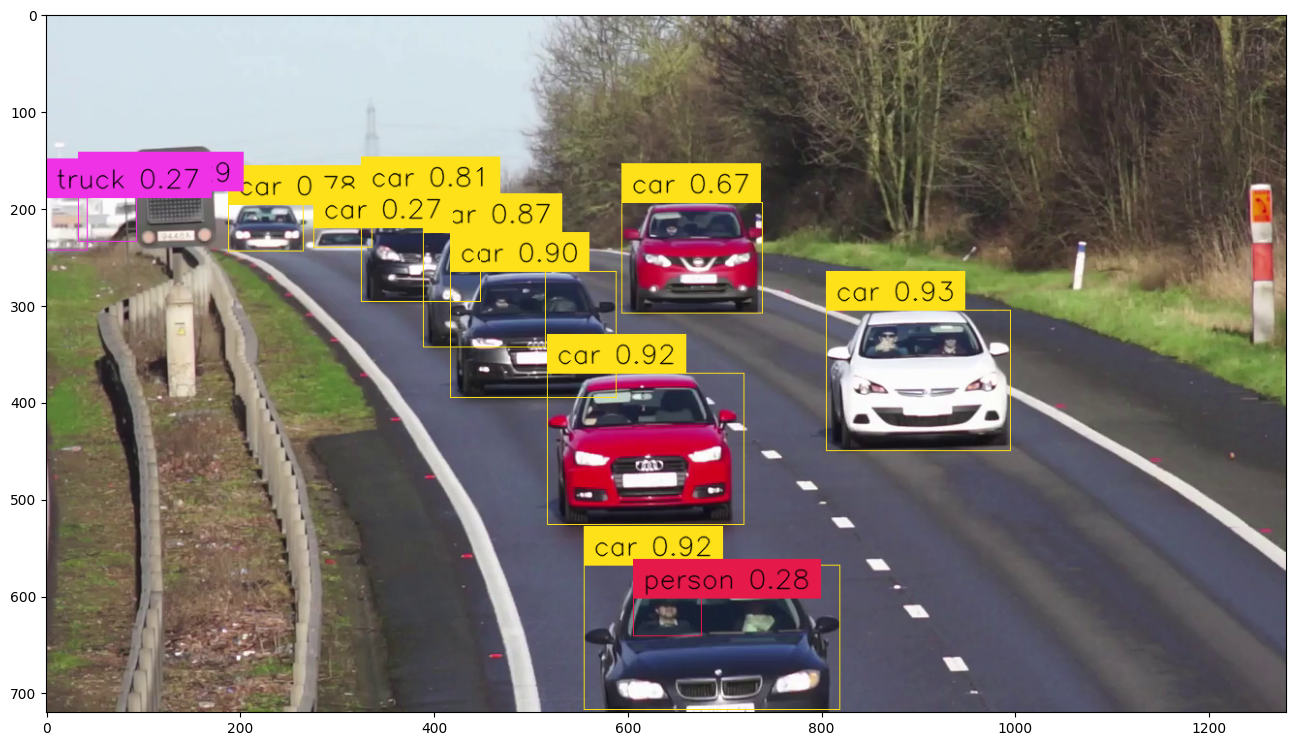

In [ ]:
#create frame generator
generator = get_video_frames_generator(SOURCE_PATH_1)
#create instance of BoxAnnotator
box_annotator = BoxAnnotator(color = ColorPalette(), thickness = 1, text_thickness=1, text_scale=0.9)
#acquire first video frame
iterator = iter(generator)
frame = next(iterator)

#model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy = results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)

#format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]

#annotate and display frame
frame= box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16,16))